**Sequential Model:**<br/>
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. For creating non-linear topologies, we have to use functional API or build custom models by subclassing.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [ ]:
#Download the Fashion MNIST dataset, it is a substitute of the MNIST dataset. This also has 10 classesbut instead of numbers, it deals with apparel types.
fashion_mnist = keras.datasets.fashion_mnist 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape, train_labels.shape #all are grayscale images.

((60000, 28, 28), (60000,))

In [ ]:
train_labels[0]

9

In [ ]:
#pre-process the data
train_images[0].max(), train_images[0].min() #Since the data is in the range 0-255, we will rescale it to 0-1

(255, 0)

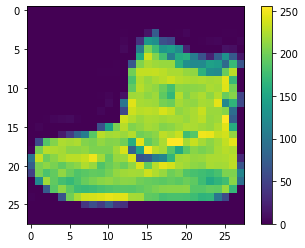

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#Re-scale images.
train_images = train_images / 255.0
test_images = test_images / 255.0

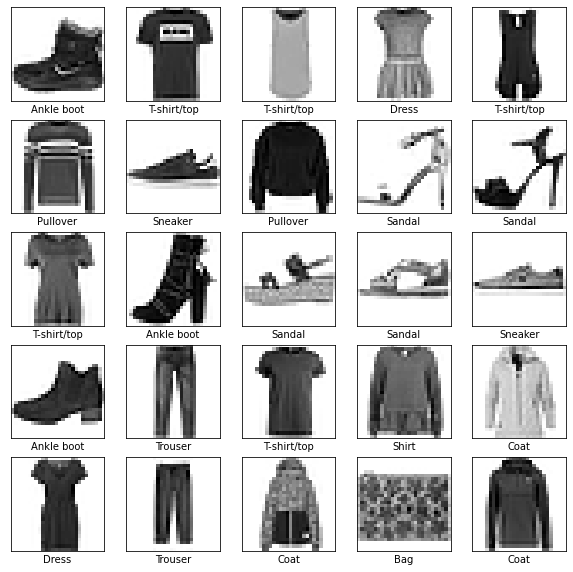

In [ ]:
#check if the data is in the correct format
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Multi - layer perceptron**

In [ ]:
#Training a simple Multi layer Perceptron Model composed of a single hidden layer, it returns the raw predictions (called logits)
#logits are typically passed through a softmax layer before prediction.
model = keras.Sequential([
                          keras.layers.Flatten(), #The flatten layer, simply flattens the input to make it compatible to be fed into the dense layer. It has no trainable weights.
                          keras.layers.Dense(128), #The dense layer- comprising of 128 units.
                          keras.layers.Dense(10) # We have 10 classes, so the final layer has 10 units.
]) 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits  =True), #The shape of y_true is [batch_size] and the shape of y_pred is [batch_size, num_classes]. If you want to use one hot vectors use categorical cross entropy loss.
              metrics=['accuracy'])

In [ ]:
train_labels = train_labels.astype(np.int32)
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)) #create tf dataset.
fmnist_test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [ ]:
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)
fmnist_test_ds = fmnist_test_ds.batch(32)

In [ ]:
history = model.fit(fmnist_train_ds, epochs=20, validation_data= fmnist_test_ds) #pass a dataset with train_image, train_label

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1875/1875 [==============================] - 6s 3ms/step - loss: 0.5393 - accuracy: 0.8116 - val_loss: 0.4905 - val_accuracy: 0.8310
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4546 - accuracy: 0.8421 - val_loss: 0.4816 - val_accuracy: 0.8339
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4416 - accuracy: 0.8455 - val_loss: 0.4722 - val_accuracy: 0.8366
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


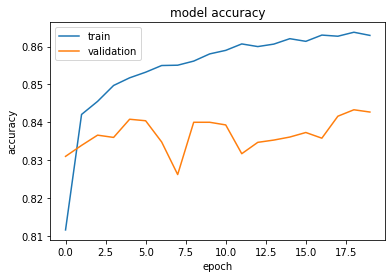

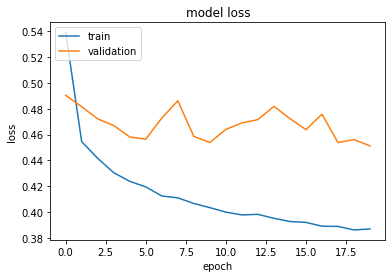

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Same architecture with dropout layer added.
model = keras.Sequential([
                          keras.layers.Flatten(),
                          keras.layers.Dense(128),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), #The shape of y_true is [batch_size] and the shape of y_pred is [batch_size, num_classes]. If you want to use one hot vectors use categorical cross entropy loss.
              metrics=['accuracy'])

In [ ]:
history = model.fit(fmnist_train_ds, epochs=20, validation_data= fmnist_test_ds) #pass a dataset with train_image, train_label

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1875/1875 [==============================] - 7s 4ms/step - loss: 0.6192 - accuracy: 0.7872 - val_loss: 0.4814 - val_accuracy: 0.8331
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5111 - accuracy: 0.8241 - val_loss: 0.4905 - val_accuracy: 0.8261
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4906 - accuracy: 0.8300 - val_loss: 0.4807 - val_accuracy: 0.8328
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


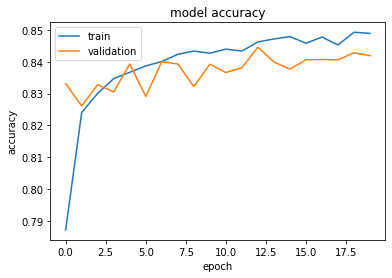

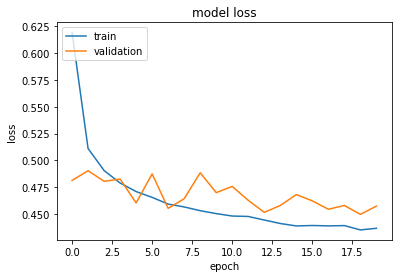

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Convolution Neural Networks**<br/>
CNN are one of the most popular choices for any computer vision tasks. The problem with dense networks with images is that each node is connected to every other node, making the number of parameters huge, which tends to lead to overfitting.<br/>
CNNs can account for local connectivity (each filter is panned around the entire image according to certain size and stride, allows the filter to find and match patterns no matter where the pattern is located in a given image).
The weights are smaller, and shared — less wasteful, easier to train than MLP. <br/>
Layers are sparsely connected rather than fully connected. Every node does not connect to every other node.

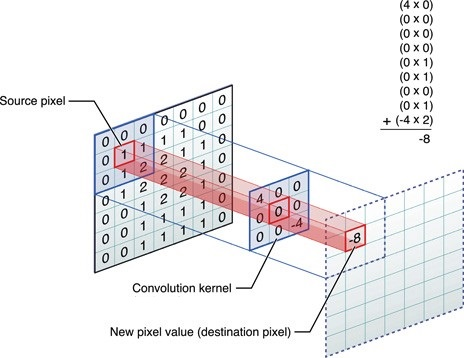

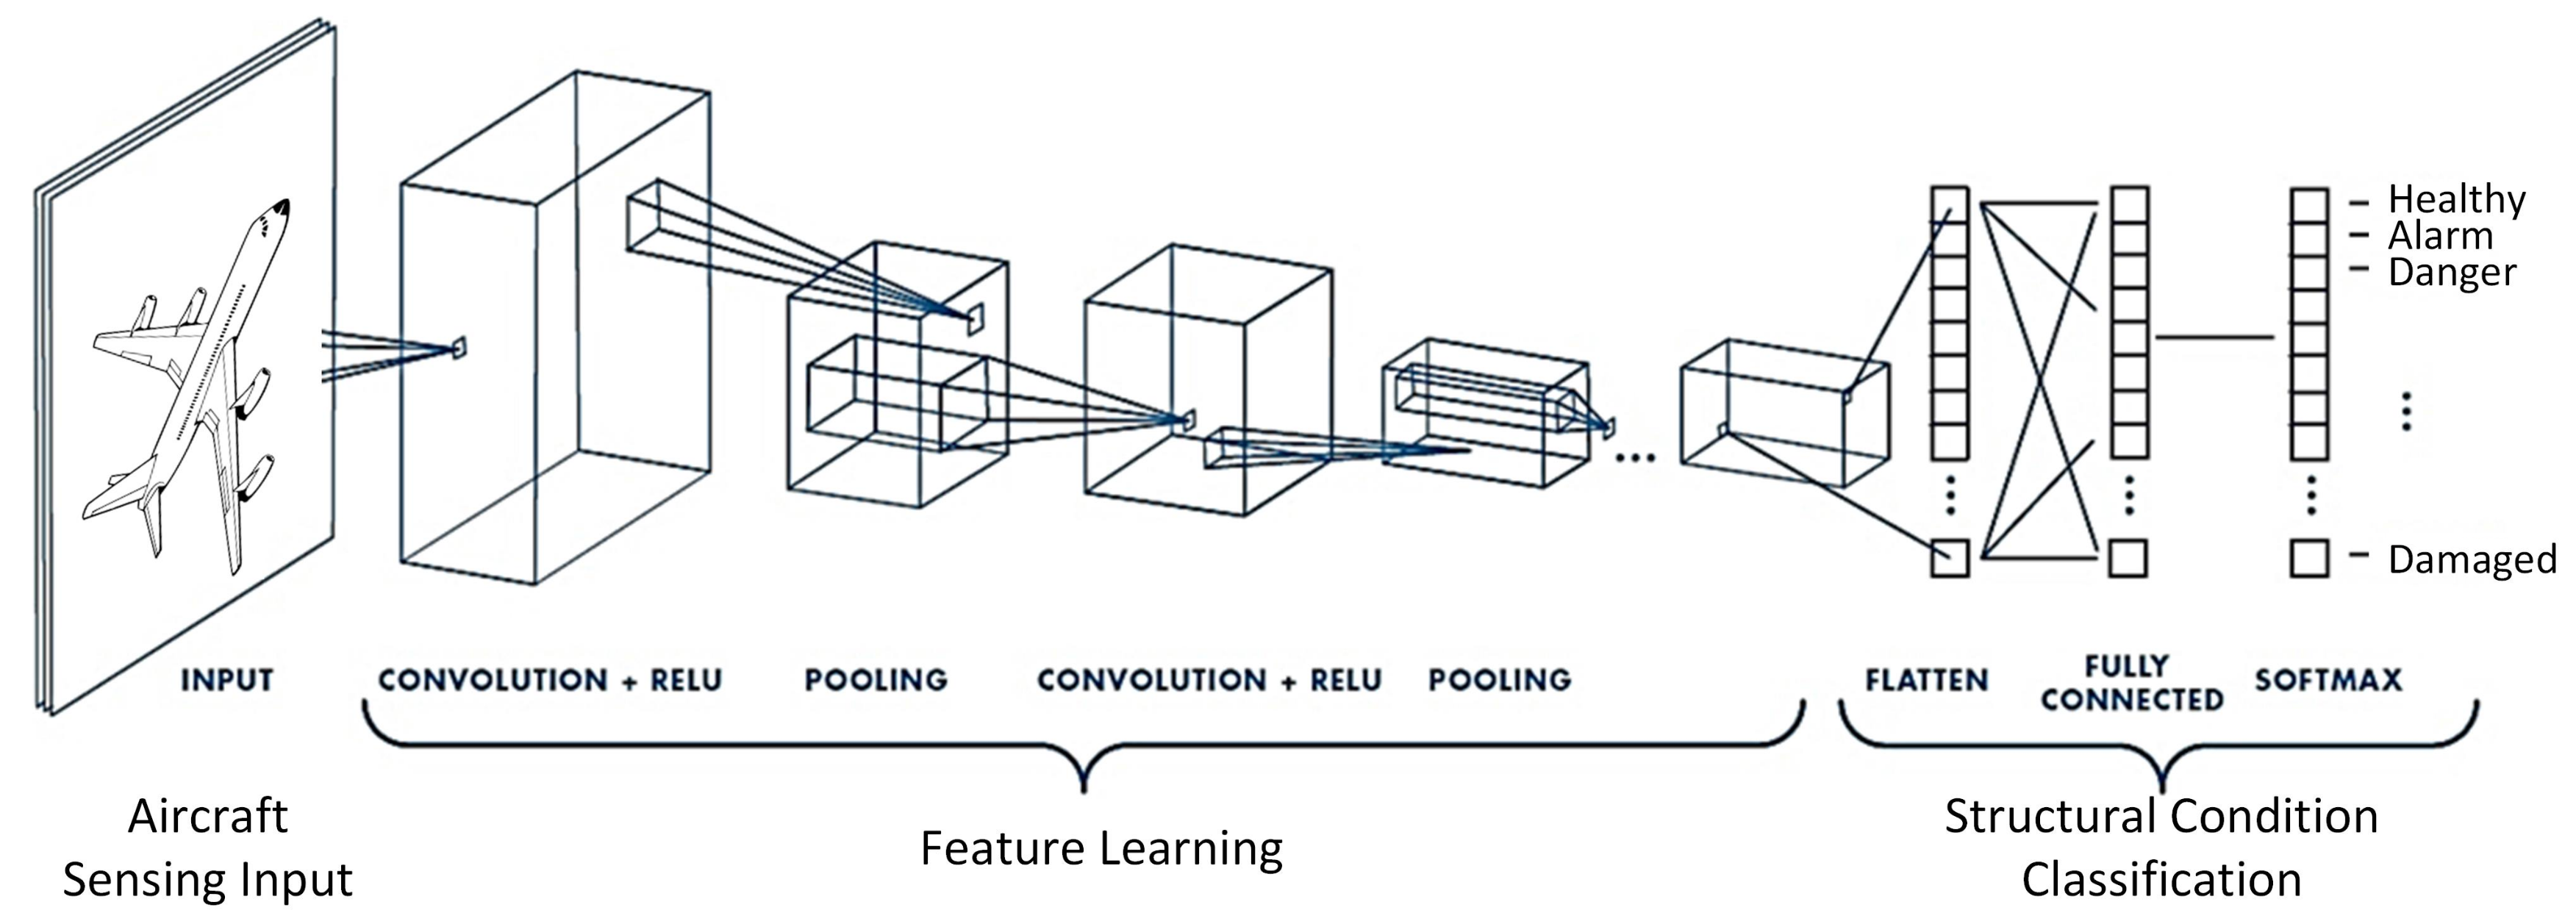

In [ ]:
#Another way to make sequential models is by using the add method.
model=keras.Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)), diagrAM FOR CNN
model.add(keras.layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(keras.layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())    
model.add(keras.layers.Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    
model.add(keras.layers.Flatten())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(10,activation="softmax"))
    


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), #The shape of y_true is [batch_size] and the shape of y_pred is [batch_size, num_classes]. If you want to use one hot vectors use categorical cross entropy loss.
              metrics=['accuracy'])

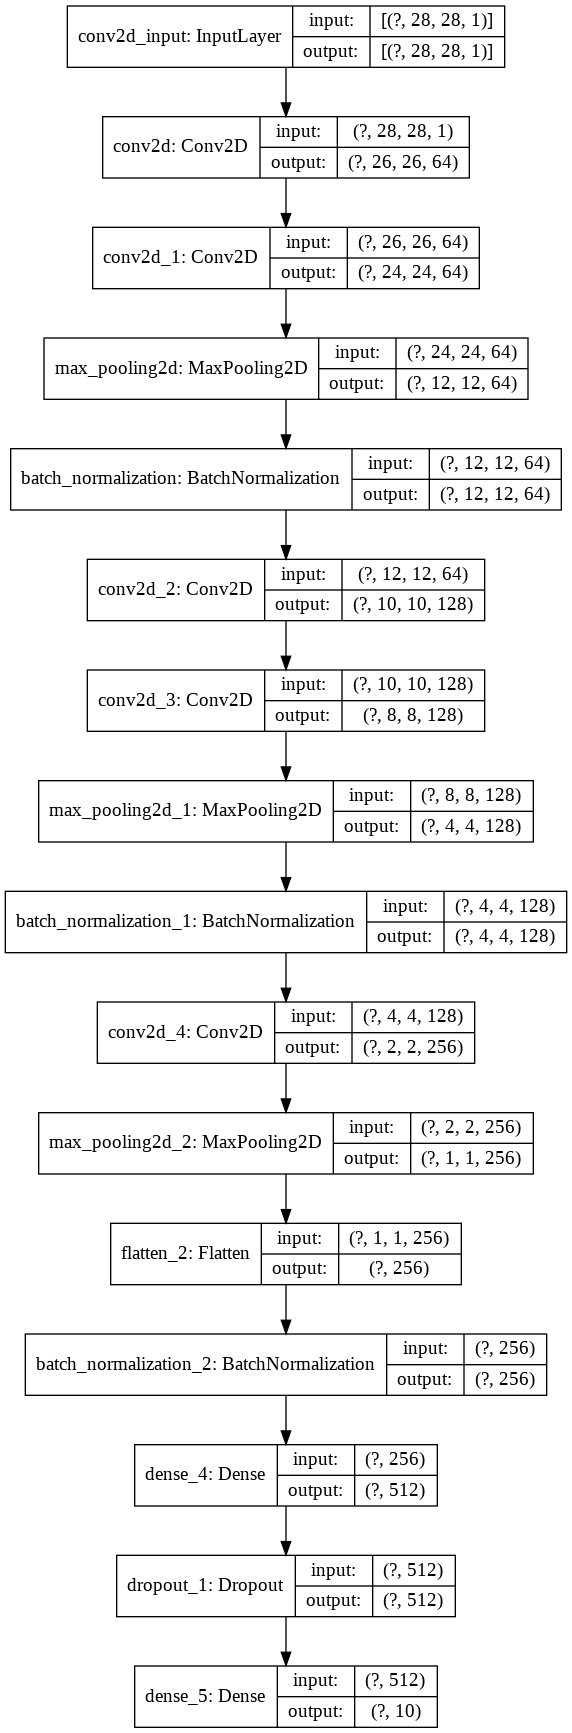

In [ ]:
keras.utils.plot_model(model, show_shapes = True)

In [ ]:
#for cnn we need image to have 3 dimesions.
train_images_cnn = np.expand_dims(train_images, axis = -1) #Adds an extra dimension on the axis specified.
test_images_cnn = np.expand_dims(test_images, axis = -1)
train_images_cnn[0].shape, test_images_cnn[0].shape

((28, 28, 1), (28, 28, 1))

In [ ]:
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((train_images_cnn, train_labels)).shuffle(5000).batch(32)
fmnist_test_ds = tf.data.Dataset.from_tensor_slices((test_images_cnn, test_labels)).shuffle(5000).batch(32)

In [ ]:
history = model.fit(fmnist_train_ds, epochs = 10, validation_data= fmnist_test_ds)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4580 - accuracy: 0.8356 - val_loss: 0.4014 - val_accuracy: 0.8547
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3112 - accuracy: 0.8883 - val_loss: 0.3236 - val_accuracy: 0.8872
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2684 - accuracy: 0.9031 - val_loss: 0.2707 - val_accuracy: 0.9011
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2377 - accuracy: 0.9147 - val_loss: 0.2607 - val_accuracy: 0.9057
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2116 - accuracy: 0.9230 - val_loss: 0.2531 - val_accuracy: 0.9130
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1931 - accuracy: 0.9306 - val_loss: 0.2208 - val_accuracy: 0.9232
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1699 - accuracy: 0.9374 - val_loss: 0.2539 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


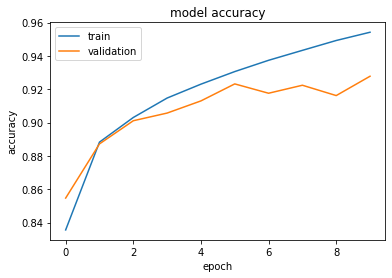

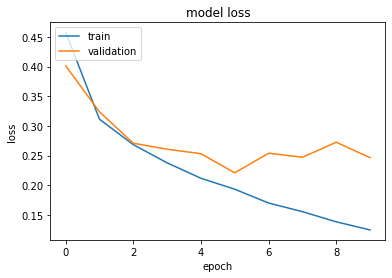

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()